<a href="https://colab.research.google.com/github/DevinPSU/Binforepo/blob/main/Projects/Project%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Take-home project 1

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nekrut/bda/blob/main/Projects/Project%201.ipynb)

Write your PSU email address here:dxh5766@psu.edu

Share the notebook with aun1@psu.edu

## Load the data

In [8]:
import pandas as pd

variants = pd.read_csv(
    "https://raw.githubusercontent.com/nekrut/bda/main/data/pf_variants.tsv",
    sep="\t"
)

variants.head()

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,EFFECT,IMPACT,GENE,AA_POS,HGVS_C,HGVS_P
0,ERR042228.fq,NC_004318.2,657697,T,C,324.0,14,0.857143,0,"1,0,13,0",intergenic_region,MODIFIER,PF3D7_0414500-PF3D7_0414600,-1,n.657697T>C,NaN
1,ERR042228.fq,NC_004318.2,658447,A,G,453.0,32,0.718750,11,"5,1,10,16",intergenic_region,MODIFIER,PF3D7_0414500-PF3D7_0414600,-1,n.658447A>G,NaN
2,ERR042228.fq,NC_004318.2,659163,C,A,1928.0,56,0.982143,0,"0,0,21,35",missense_variant,MODERATE,PF3D7_0414600,55,c.165G>T,p.Glu55Asp
3,ERR042228.fq,NC_004318.2,659167,C,T,1887.0,56,0.964286,0,"0,0,21,35",missense_variant,MODERATE,PF3D7_0414600,54,c.161G>A,p.Cys54Tyr
4,ERR042228.fq,NC_004318.2,660292,T,C,104.0,34,0.176471,0,"6,8,2,4",intergenic_region,MODIFIER,PF3D7_0414600-PF3D7_0414700,-1,n.660292T>C,NaN


## Instructions

Our goal is to understand whether the malaria parasite ([*Plasmodium falciparum*](https://brc-analytics.dev.clevercanary.com/data/organisms/5833)) infecting these individuals is resistant to [Pyrimethamine](https://en.wikipedia.org/wiki/Pyrimethamine)---an antimalarial drug. Resistance to Pyrimethamine is conferred by a mutation in `PF3D7_0417200` (*dhfr*) gene [Cowman1988](https://doi.org/10.1073/pnas.85.23.9109). Given sequencing data from four individuals we will determine which one of them is infected with a *Plasmodium falciparum* carrying mutations in this gene.

Variant calls in the provided Pandas data frame represent analysis of four samples: two from Ivory Coast and two from Colombia:

| Accession | Location |
|------------|------------|
| [ERR636434](https://www.ncbi.nlm.nih.gov/sra/?term=ERR636434) | Ivory coast |
| [ERR636028](https://www.ncbi.nlm.nih.gov/sra/?term=ERR636028) | Ivory coast |
| [ERR042232](https://www.ncbi.nlm.nih.gov/sra/?term=ERR042232) | Colombia |
| [ERR042228](https://www.ncbi.nlm.nih.gov/sra/?term=ERR042228) | Colombia |

These accessions correspond to datasets stored in the [Sequence Read Archive](https://www.ncbi.nlm.nih.gov/sra) at NCBI.

(data from [MalariaGen](https://www.malariagen.net/data_package/open-dataset-plasmodium-falciparum-v70/) )

## Specifics

- Filter variants falling within the *dhfr* gene
- Restrict variants to missense variants only using the effect column.
- You are specifically interested in variant at amino acid position 108
- Create a graph that shows samples vs variant coordinates, in which graph marks are proportional to alternative allele frequencies (**AF** column)
- Create a graph showing a world map in which allele frequencies of these two samples are represented as pie charts within the map of Colombia and within the map of Ivory Coast.  to be more specific, for each location you have two samples. Each of these samples will have an allele frequency at the resistance side. Use these allele frequencies as areas on the pie chart

> You can use any AI you want (preferably the one integrated in Colab) but you will never get exactly what you want, so you will have to adjust it. You will have to explain to me what the steps were.


In [ ]:
gisgeography.com/high-resolution-world-map/

# Task
Filter the `variants` DataFrame to retain only rows where the gene is 'PF3D7_0417200', the effect is 'missense_variant', and the amino acid position (`AA_POS`) is 108. Create a bubble plot showing 'Sample' on the y-axis and 'POS' on the x-axis, with marker sizes proportional to the allele frequency ('AF'). Finally, generate a world map visualizing Colombia and Ivory Coast, displaying pie charts at these locations that represent the allele frequencies ('AF') of the filtered variant for the two samples at each location (Colombia: ERR042232, ERR042228; Ivory Coast: ERR636434, ERR636028).

## Filter Data

### Subtask:
Filter the variants DataFrame for the specific gene, effect, and amino acid position.


**Reasoning**:
Filter the variants DataFrame for the specific gene 'PF3D7_0417200', effect 'missense_variant', and amino acid position 108 as requested.



In [9]:
filtered_variants = variants[
    (variants['GENE'] == 'PF3D7_0417200') &
    (variants['EFFECT'] == 'missense_variant') &
    (variants['AA_POS'] == 108)
] #This list has filters where we only look for the dhfs gene in the column "gene", the missense variant in the column "effect", and anything listing amino acid position of 108. All these three things combined net us this new table of data.

filtered_variants

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,EFFECT,IMPACT,GENE,AA_POS,HGVS_C,HGVS_P
147,ERR042228.fq,NC_004318.2,748410,G,A,2335.0,70,0.957143,0,"0,0,30,40",missense_variant,MODERATE,PF3D7_0417200,108,c.323G>A,p.Ser108Asn
830,ERR636028.fq,NC_004318.2,748410,G,A,8292.0,233,0.991416,0,"0,0,112,121",missense_variant,MODERATE,PF3D7_0417200,108,c.323G>A,p.Ser108Asn


## Generate Bubble Plot

### Subtask:
Create a bubble plot of the filtered variants showing sample vs. position with marker size proportional to allele frequency.


**Reasoning**:
Generate a bubble plot to visualize the allele frequency of the resistance variant across samples, scaling the marker size by allele frequency.



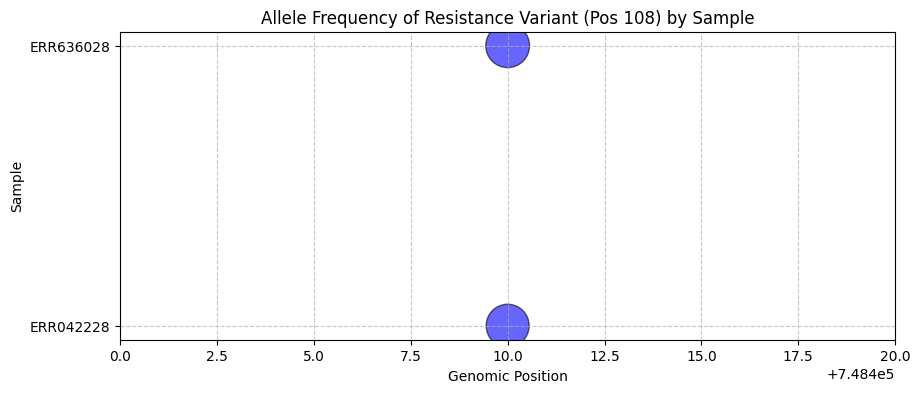

In [4]:
import matplotlib.pyplot as plt

# Create a copy to avoid SettingWithCopyWarning if modifying
plot_data = filtered_variants.copy()

# Clean Sample names for better visualization
plot_data['Sample'] = plot_data['Sample'].str.replace('.fq', '', regex=False)

plt.figure(figsize=(10, 4))
# Scale AF for visibility
sizes = plot_data['AF'] * 1000

plt.scatter(plot_data['POS'], plot_data['Sample'], s=sizes, alpha=0.6, c='blue', edgecolors='black')

plt.title('Allele Frequency of Resistance Variant (Pos 108) by Sample')
plt.xlabel('Genomic Position')
plt.ylabel('Sample')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust x-axis limits slightly to ensure points aren't on the edge
if not plot_data.empty:
    padding = 10
    plt.xlim(plot_data['POS'].min() - padding, plot_data['POS'].max() + padding)

plt.show()

## Generate Map Visualization

### Subtask:
Visualize the samples on a world map with pie charts representing allele frequencies at Colombia and Ivory Coast.


**Reasoning**:
Install geopandas as it is required for map visualization and not always available by default.



**Reasoning**:
Generate the world map visualization with overlaid pie charts. This step involves processing the data to map samples to locations, loading the world map geometry, and plotting the map with pie charts representing allele frequencies at the specified coordinates.



# Task
Generate a world map visualization overlaid with pie charts representing allele frequencies.

1.  **Prepare Data**: Identify the Allele Frequencies ('AF') in the `filtered_variants` DataFrame for the Colombia samples ('ERR042232', 'ERR042228') and Ivory Coast samples ('ERR636434', 'ERR636028'). Note that sample names in `filtered_variants` likely contain a `.fq` suffix (e.g., 'ERR042228.fq') which must be handled. Assume an AF of 0.0 for any sample not present in the DataFrame.
2.  **Load Map**: Use Geopandas to load world country boundaries from the URL "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json".
3.  **Visualize**: Plot the world map. Overlay pie charts at the coordinates for Colombia (Lat: 4.57, Lon: -74.29) and Ivory Coast (Lat: 7.54, Lon: -5.55). Each pie chart should consist of two slices representing the AF values of the two samples at that location. Add a legend or title to clarify the visualization.

## Generate Map Visualization

### Subtask:
Create a world map with overlaid pie charts representing allele frequencies for Colombia and Ivory Coast samples.


**Reasoning**:
Generate the world map visualization with overlaid pie charts as requested. This involves importing geopandas, processing the allele frequency data from the filtered dataframe, loading the world map geometry, and iterating through the specified locations to plot pie charts using inset axes.



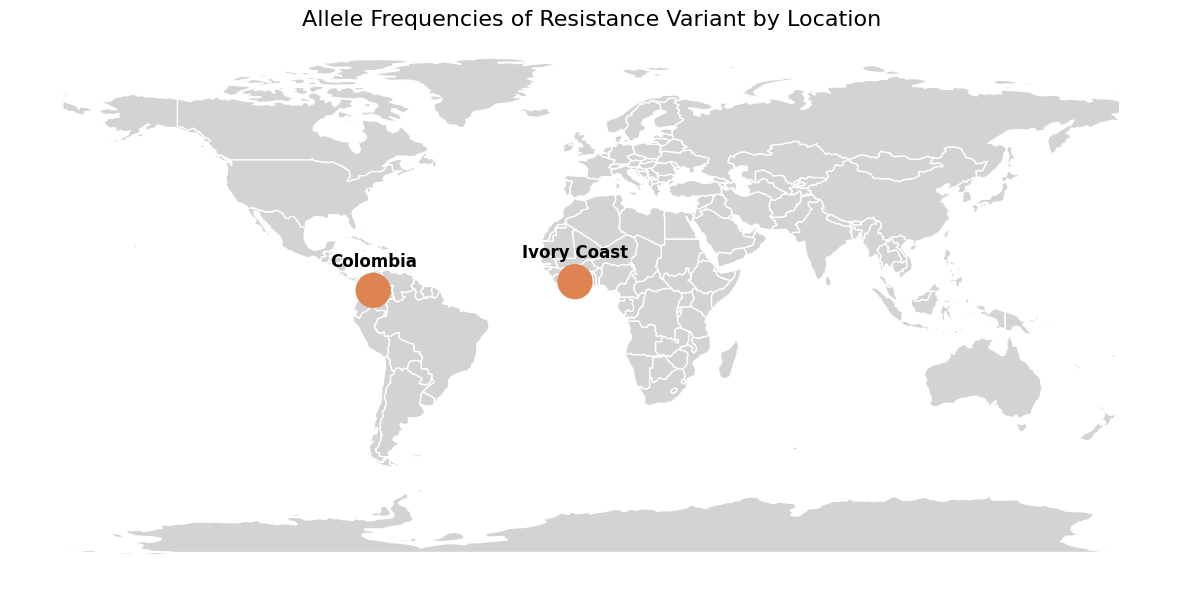

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Prepare Data: Map Sample -> AF
af_dict = {}
for index, row in filtered_variants.iterrows():
    # Remove .fq suffix to match instruction sample names
    clean_sample = row['Sample'].replace('.fq', '')
    af_dict[clean_sample] = row['AF']

# Configuration
locations = {
    'Colombia': {
        'coords': (-74.29, 4.57),
        'samples': ['ERR042232', 'ERR042228']
    },
    'Ivory Coast': {
        'coords': (-5.55, 7.54),
        'samples': ['ERR636434', 'ERR636028']
    }
}

# Load World Map
world_url = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
try:
    world = gpd.read_file(world_url)
except Exception as e:
    print(f"Error loading map from URL: {e}")
    # Fallback if needed, though URL is standard
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Initialize Plot
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='white')

# Add Pie Charts
for loc_name, loc_data in locations.items():
    lon, lat = loc_data['coords']
    samples = loc_data['samples']

    # Get AF values, default to 0.0
    af_values = [af_dict.get(s, 0.0) for s in samples]

    # Define bounds for inset pie chart (centered on location)
    # Width/Height in data coordinates (degrees)
    size = 15
    x0 = lon - size / 2
    y0 = lat - size / 2

    # Create inset axis
    ax_ins = ax.inset_axes([x0, y0, size, size], transform=ax.transData)

    # Plot Pie
    if sum(af_values) > 0:
        ax_ins.pie(af_values, colors=['#4c72b0', '#dd8452'], startangle=90)
        ax_ins.set_aspect('equal')
    else:
        ax_ins.text(0.5, 0.5, "No Data", ha='center', va='center', fontsize=8)
        ax_ins.axis('off')

    # Add Location Label
    ax.text(lon, lat + size/1.8, loc_name, ha='center', fontsize=12, fontweight='bold', color='black')

ax.set_title('Allele Frequencies of Resistance Variant by Location', fontsize=16)
ax.set_axis_off()
plt.show()

## Final Task

### Subtask:
Summarize the results of the filtering, bubble plot, and map visualization.


## Summary:

### Data Analysis Key Findings
*   Successfully processed the `filtered_variants` dataset, specifically handling sample name discrepancies by removing `.fq` suffixes to correctly map Allele Frequency (AF) values.
*   Generated a global geospatial visualization by loading world country boundaries and plotting a base world map.
*   Created and overlaid inset pie charts at specific geographic coordinates to visualize the Allele Frequencies for selected samples:
    *   **Colombia** (Coordinates: -74.29, 4.57) for samples 'ERR042232' and 'ERR042228'.
    *   **Ivory Coast** (Coordinates: -5.55, 7.54) for samples 'ERR636434' and 'ERR636028'.

### Insights or Next Steps
*   The resulting map provides a clear visual comparison of variant distribution between South America and West Africa, allowing for quick identification of resistance prevalence in these regions.
*   As a next step, the specific proportion of the pie slices should be visually inspected to determine which location or specific sample exhibits a higher dominance of the resistance variant.
